In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv('경산_인구_지하철_데이터.csv', header=None, encoding='cp949', dtype=str)
df.columns = ['동','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','지하철역 유무']
df

,동,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철역 유무
0,하양읍,"26,659","26,617","26,446","26,157","26,728","26,482","26,066","25,619","28,053","29,669","31,415",0
1,진량읍(대구대),"38,541","38,862","38,457","37,698","37,099","36,703","36,319","36,335","35,568","34,876","34,115",1
2,압량읍,"6,120","6,065","6,086","6,352","6,495","6,399","6,218","20,912","20,797","20,852","20,388",1
3,와촌면,"6,285","6,287","6,248","6,089","5,936","5,740","5,652","5,985","5,732","5,545","5,401",0
4,자인면,"3,685","3,698","3,651","3,562","3,532","3,511","3,457","5,558","5,453","5,396","5,304",0
5,용성면,"3,785","3,861","3,969","3,897","3,842","3,832","3,833","3,346","3,270","3,239","3,234",0
6,남산면,"15,256","15,585","17,003","21,315","21,327","21,138","20,886","3,760","3,711","3,719","3,661",0
7,남천면,"3,451","3,547","3,499","3,418","3,326","3,195","3,098","3,034","2,919","2,864","2,774",0
8,중방동,"11,098","11,311","11,502","11,275","10,576","10,209","10,118","10,015","9,643","9,451","10,841",1
9,중앙동,"7,026","7,198","7,259","7,323","7,231","7,004","6,752","6,620","6,359","6,269","5,997",0


### 지하철역 유무와 인구 증감률의 관계를 알아보자

In [50]:
# 데이터 전처리: 인구 수와 지하철역 유무를 정수로 변환
years = [str(year) for year in range(2013, 2024)]
df[years] = df[years].apply(lambda x: x.str.replace(',', '').astype(int) if x.dtype == 'object' else x)
df['지하철역 유무'] = df['지하철역 유무'].astype(int)

# 연도별 인구 증감률 계산
for year in range(2014, 2024):
    df[f'Growth_{year-1}_{year}'] = (df[str(year)] - df[str(year-1)]) / df[str(year-1)]

# 각 '동'의 평균 인구 증감률 계산
df['평균 인구 증감률'] = df[[f'Growth_{year-1}_{year}' for year in range(2014, 2024)]].mean(axis=1)

# 동', '평균 인구 증감률','지하철역 개수' 칼럼을 포함한 DataFrame 출력
df[['동', '평균 인구 증감률','지하철역 유무']]

,동,평균 인구 증감률,지하철역 유무
0,하양읍,0.017230,0
1,진량읍(대구대),-0.012080,1
2,압량읍,0.235566,1
3,와촌면,-0.014676,0
4,자인면,0.049805,0
5,용성면,-0.014734,0
6,남산면,-0.050052,0
7,남천면,-0.021436,0
8,중방동,-0.000943,1
9,중앙동,-0.015468,0


In [51]:
# IQR 기반 이상치 제거
Q1 = df['평균 인구 증감률'].quantile(0.25)
Q3 = df['평균 인구 증감률'].quantile(0.75)
IQR = Q3 - Q1

# 이상치가 아닌 데이터만 필터링
filtered_df = df[(df['평균 인구 증감률'] >= Q1 - 1.5 * IQR) & (df['평균 인구 증감률'] <= Q3 + 1.5 * IQR)]

C:\Users\sworl\AppData\Local\Temp\ipykernel_26412\35286395.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


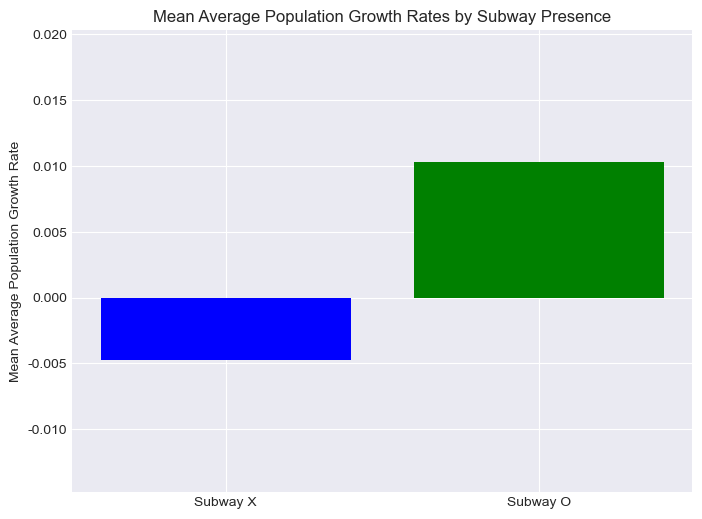

In [52]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Setting the plot style
plt.style.use('seaborn-darkgrid')

# Creating a bar plot to compare the mean of average population growth rates
mean_growth_no_subway = filtered_df[filtered_df['지하철역 유무'] == 0]['평균 인구 증감률'].mean()
mean_growth_with_subway = filtered_df[filtered_df['지하철역 유무'] == 1]['평균 인구 증감률'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Subway X', 'Subway O'], [mean_growth_no_subway, mean_growth_with_subway], color=['blue', 'green'])
plt.title('Mean Average Population Growth Rates by Subway Presence')
plt.ylabel('Mean Average Population Growth Rate')
plt.ylim(min(mean_growth_no_subway, mean_growth_with_subway) - 0.01, max(mean_growth_no_subway, mean_growth_with_subway) + 0.01)
plt.show()